In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Ukuran gambar:{img.shape}")
  return img

Ukuran gambar:(500, 500, 3)


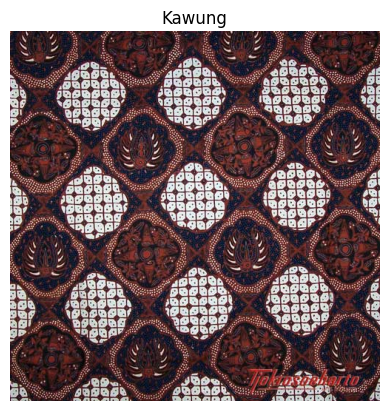

In [2]:
img = view_random_image("data/train/","Kawung")

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
tf.random.set_seed(46)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_dir = "data/train/"
valid_dir = "data/test/"

In [15]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(450,450),
                                               class_mode="categorical",
                                               seed=46)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=16,
                                               target_size=(450,450),
                                               class_mode="categorical",
                                               seed=46)

Found 580 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [16]:
model_1 = Sequential([
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(6, activation= "softmax")
                      ])

In [17]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [18]:
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.2249 - loss: 6.2452 - val_accuracy: 0.2500 - val_loss: 1.8801
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.4455 - loss: 1.5478 - val_accuracy: 0.2833 - val_loss: 1.8142
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.5813 - loss: 1.2137 - val_accuracy: 0.4000 - val_loss: 2.2293
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.7121 - loss: 0.9218 - val_accuracy: 0.3833 - val_loss: 1.9981
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.8582 - loss: 0.5314 - val_accuracy: 0.3500 - v

In [11]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    #plot
    plt.plot(epochs,loss,label = 'training_loss')
    plt.plot(epochs,val_loss,label = 'val_loss')
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs,accuracy,label = 'training_acc')
    plt.plot(epochs,val_accuracy,label = 'val_acc')
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

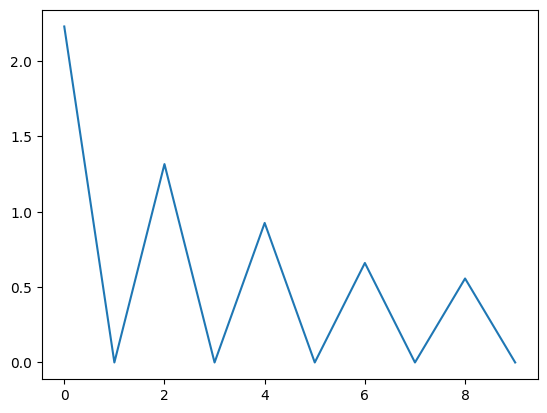

In [12]:
plot_loss_curves(history_1)

In [ ]:
# augmentasi data
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_augmented = train_datagen.flow_from_directory(train_dir,
                                                        batch_size=32,
                                                        target_size=(450,450),
                                                        class_mode="categorical",
                                                        shuffle=True)

In [ ]:
model_2 = Sequential([
                      Conv2D(50,3,activation='relu'),
                      Conv2D(50,3,activation='relu'),
                      MaxPool2D(2),
                      Conv2D(50,3,activation='relu'),
                      Conv2D(50,3,activation='relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(6, activation= "softmax")
                      ])
model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data_augmented,
                        epochs=10,
                        validation_data=valid_data)

In [ ]:
plot_loss_curves(history_2)

In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(450,450,3),
                                                           include_top=False,
                                                           weights='imagenet'
                                                          )

In [ ]:
base_model.trainable = False

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = Dense(6)
soft = Activation('softmax')

inputs = tf.keras.Input(shape=(450,450,3))
x = base_model(inputs,training = False)
x = global_average_layer (x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
outputs = soft(outputs)

model = tf.keras.Model(inputs,outputs)

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

history = model.fit(train_data_augmented,
                    epochs=10,
                    validation_data=valid_data)

In [ ]:
plot_loss_curves(history)